In [5]:
import os
import csv
import pandas as pd
import json
import matplotlib.pyplot as plt

In [6]:
exp_name = 'small-10-gen' #"8-gen" #"small-10-gen" #"retest-4-gen" #"31-dic"
log_folder = f"../out/log/{exp_name}"
exp_folder = f"../out/exp/{exp_name}"
models_folder = f"../out/models/{exp_name}"
max_epochs = 600
main_metric = "val_NDCG_@10/dataloader_idx"

In [7]:
# # Inside each folder of folder, load the metrics.csv and record the last row first value

# cont=0
# for exp_id in os.listdir(folder):
#     metrics_file = os.path.join(folder, exp_id, "lightning_logs", "version_0", "metrics.csv")
#     # if not os.path.exists(metrics_file):
#     #     continue
#     cont+=1
#     with open(metrics_file, "r") as f:
#         reader = csv.reader(f)
#         rows = list(reader)
#         if len(rows) == 0:
#             continue
#         print(f"{exp_id}: {rows[-1][0]}")

In [8]:
# Inside each folder of folder, load the metrics.csv and get the last value of column
column_to_get = f"{main_metric}_0"

#top_k = 10 #keep highest k

exps = {}
not_finished_exps = set()
for exp_id in os.listdir(log_folder):
    metrics_file = os.path.join(log_folder, exp_id, "lightning_logs", "version_0", "metrics.csv")
    # if not os.path.exists(metrics_file):
    #     continue
    # load as 
    if not os.path.exists(metrics_file):
        continue
    df = pd.read_csv(metrics_file)
    # if df["epoch"].iloc[-1] != max_epochs -1:
    #     not_finished_exps.add(exp_id)
    #     continue
    # get best value of column
    if column_to_get in df.columns:
        exps[exp_id] = df[column_to_get].max()

# sort by value
sorted_exps = sorted(exps.items(), key=lambda x: x[1], reverse=True)
# get top k
top_k_exps = sorted_exps#[:top_k]
print(top_k_exps)

[('EHuynx3bStccaxTY', np.float64(0.8184081315994263)), ('T2p88a1EGTj2xFPT', np.float64(0.8174185752868652)), ('WTj3gSEOaVStbC1Z', np.float64(0.8142211437225342)), ('TUuIAeTssWiMNTNh', np.float64(0.8123802542686462)), ('3gRjQjCgeTvgAuQj', np.float64(0.8100943565368652)), ('gH9vpVwx8orcVIac', np.float64(0.8087815642356873)), ('JcqMqXwFo6U5TVvG', np.float64(0.8056678175926208)), ('2eMGKVswzdalRX7x', np.float64(0.8020299673080444)), ('s7cGAEl1sab7pLbA', np.float64(0.801410436630249)), ('LEGTSdGDWowWAPmP', np.float64(0.8013617396354675)), ('S5x23tsWF1yJUpND', np.float64(0.7969971895217896)), ('kYGXyoek0xSKxqJr', np.float64(0.7956254482269287)), ('63Mt1IzDRSFvPbiX', np.float64(0.7954612970352173)), ('Tfnjn3QOakIqMld8', np.float64(0.794780433177948)), ('0F5ZTGFKTA22erOC', np.float64(0.7947776913642883)), ('HlTpmMPtCpTFSTGm', np.float64(0.7936853766441345)), ('DgWIl8n6UD52jGGj', np.float64(0.7914736270904541)), ('LfyPrAYSF1DeROkw', np.float64(0.789332926273346)), ('MdIFezIN7SQ7AMVi', np.float6

In [9]:
top_k_exps

[('EHuynx3bStccaxTY', np.float64(0.8184081315994263)),
 ('T2p88a1EGTj2xFPT', np.float64(0.8174185752868652)),
 ('WTj3gSEOaVStbC1Z', np.float64(0.8142211437225342)),
 ('TUuIAeTssWiMNTNh', np.float64(0.8123802542686462)),
 ('3gRjQjCgeTvgAuQj', np.float64(0.8100943565368652)),
 ('gH9vpVwx8orcVIac', np.float64(0.8087815642356873)),
 ('JcqMqXwFo6U5TVvG', np.float64(0.8056678175926208)),
 ('2eMGKVswzdalRX7x', np.float64(0.8020299673080444)),
 ('s7cGAEl1sab7pLbA', np.float64(0.801410436630249)),
 ('LEGTSdGDWowWAPmP', np.float64(0.8013617396354675)),
 ('S5x23tsWF1yJUpND', np.float64(0.7969971895217896)),
 ('kYGXyoek0xSKxqJr', np.float64(0.7956254482269287)),
 ('63Mt1IzDRSFvPbiX', np.float64(0.7954612970352173)),
 ('Tfnjn3QOakIqMld8', np.float64(0.794780433177948)),
 ('0F5ZTGFKTA22erOC', np.float64(0.7947776913642883)),
 ('HlTpmMPtCpTFSTGm', np.float64(0.7936853766441345)),
 ('DgWIl8n6UD52jGGj', np.float64(0.7914736270904541)),
 ('LfyPrAYSF1DeROkw', np.float64(0.789332926273346)),
 ('MdIFezIN7S

In [10]:
len(not_finished_exps)

0

In [11]:
# Delete not finished experiments models_folders
# for exp_id in not_finished_exps:
#     for main_folder in [models_folder, log_folder]:
#         folder_to_delete = os.path.join(main_folder, exp_id)
#         print(f"Deleting {folder_to_delete}")
#         os.system(f"rm -rf {folder_to_delete}")

In [12]:
#For each exp_id in exps, load the json configuration from exp_folder
confs = {}
for exp_id, _ in top_k_exps:
    config_file = os.path.join(exp_folder, f"{exp_id}.json")
    with open(config_file, "r") as f:
            confs[exp_id] = json.load(f)

In [13]:
conf_name = {}
for exp_id,conf in confs.items():
    conf_init = conf.get("init",None)
    if conf_init is None:
        conf_name[exp_id] = "Random"
    else:
        if "alpha" in conf_init:
            conf_name[exp_id] = "Leporid"
        else:
            conf_name[exp_id] = "SVD"
            if conf_init["training"]["cutoff"]:
                conf_name[exp_id] += " (cutoff)"

In [14]:
separate_by = ["model.rec_model.name", "data_params.name", "model.rec_model.emb_size"]
separated_exps = {}
for exp_id, conf in confs.items():
    complete_key = []
    for keys_dotted in separate_by:
        app_conf = conf
        for key in keys_dotted.split("."):
            app_conf = app_conf.get(key, None)
            if app_conf is None:
                break
        complete_key.append(app_conf)
    complete_key = tuple(complete_key)
    if complete_key not in separated_exps:
        separated_exps[complete_key] = []
    separated_exps[complete_key].append(exp_id)

In [15]:
keys_to_remove=[('SASRec', 'bookcrossing', 8), ('SASRec', 'behance', 8), ('SASRec', 'amazon_beauty', 64), ('GRU4Rec', 'amazon_beauty', 64),
                ('BERT4Rec', 'amazon_beauty', 64), ('SASRec', 'foursquare-tky', 64),('BERT4Rec', 'foursquare-tky', 64),('GRU4Rec', 'foursquare-tky', 64)]
if exp_name == '8-gen':
    for key in keys_to_remove:
        if key in separated_exps:
            del separated_exps[key]

In [16]:
# Inside each folder of folder, load the metrics.csv and get the complete column
exps_metrics = {}

test_metric = "val_NDCG_@10/dataloader_idx"

val_column = f"{main_metric}_0"
#test_column = f"{main_metric}_1"
test_column = f"{test_metric}_1"

test_metrics = {}

for exp_id,_ in top_k_exps:
    metrics_file = os.path.join(log_folder, exp_id, "lightning_logs", "version_0", "metrics.csv")
    # if not os.path.exists(metrics_file):
    #     continue
    # load as pandas
    df = pd.read_csv(metrics_file)
    # get last value of column that is not nan
    column_values = df[test_column]
    exps_metrics[exp_id] = column_values.dropna().to_numpy()

    test_metrics[exp_id] = column_values[df[val_column].argmax()]

In [17]:
color_map = {
    "Random": '#66CCEE',
    "SVD": '#228833',
    #"SVD": '#EE6677',
    "Leporid": '#CCBB44',
    "SVD (cutoff)": '#EE6677'
    #"SVD (cutoff)": "#228833"
}

Plotting Leporid EHuynx3bStccaxTY
Plotting SVD TUuIAeTssWiMNTNh
Plotting Random Tfnjn3QOakIqMld8
('SASRec', 'amazon_beauty', 32)


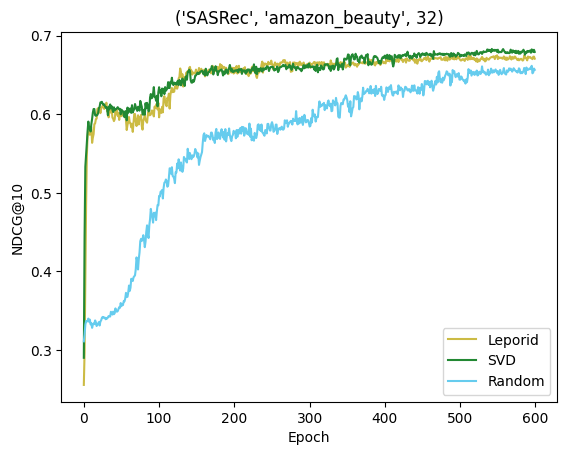

Plotting Leporid T2p88a1EGTj2xFPT
Plotting SVD gH9vpVwx8orcVIac
Plotting Random wOBmiw8ychNiYerJ
('SASRec', 'amazon_beauty', 16)


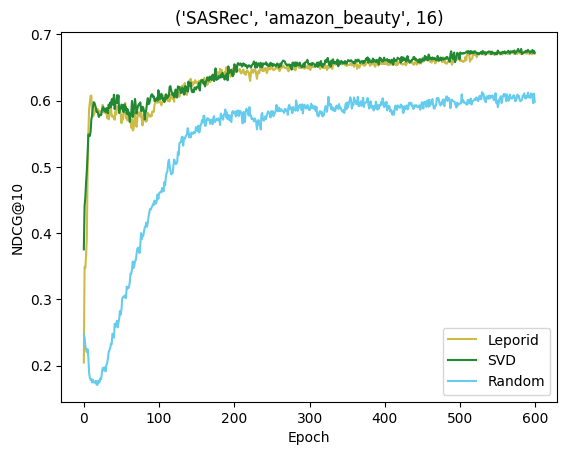

Plotting Leporid kYGXyoek0xSKxqJr
Plotting SVD HlTpmMPtCpTFSTGm
Plotting Random AABZ6QtdJRrZxr6V
('BERT4Rec', 'amazon_beauty', 32)


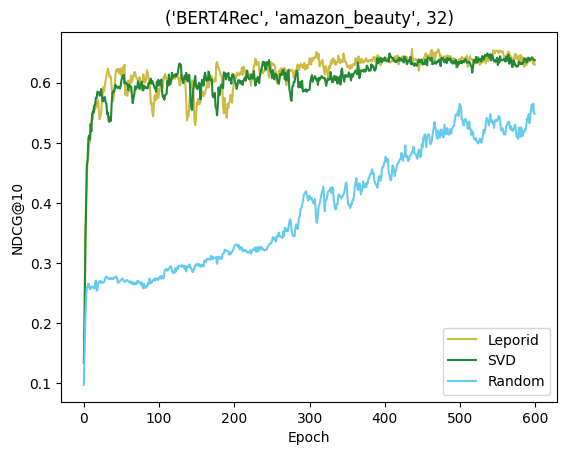

Plotting Leporid JcqMqXwFo6U5TVvG
Plotting Random 2eMGKVswzdalRX7x
Plotting SVD DgWIl8n6UD52jGGj
('GRU4Rec', 'amazon_beauty', 32)


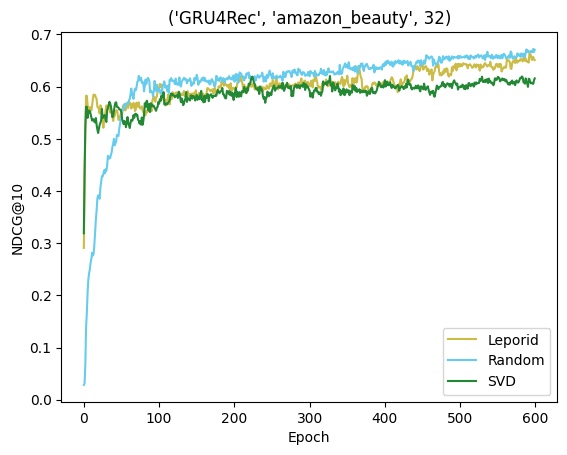

Plotting SVD s7cGAEl1sab7pLbA
Plotting Leporid LEGTSdGDWowWAPmP
Plotting Random BxJZFYDa7854ojtG
('SASRec', 'amazon_beauty', 8)


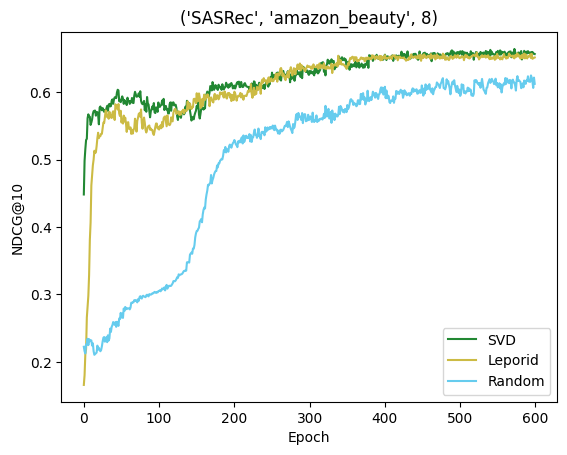

Plotting Leporid S5x23tsWF1yJUpND
Plotting SVD 0F5ZTGFKTA22erOC
Plotting Random KaByqvnrBcCRvGZM
('BERT4Rec', 'amazon_beauty', 16)


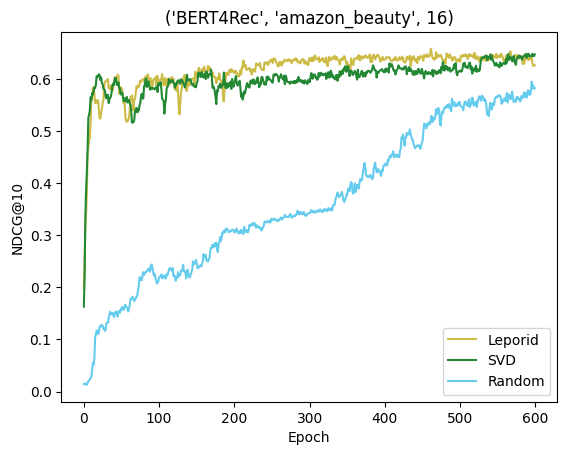

Plotting SVD LfyPrAYSF1DeROkw
Plotting Leporid 1nfA5wXYJamdTNph
Plotting Random 7NfatqV4prekAn6i
('BERT4Rec', 'amazon_beauty', 8)


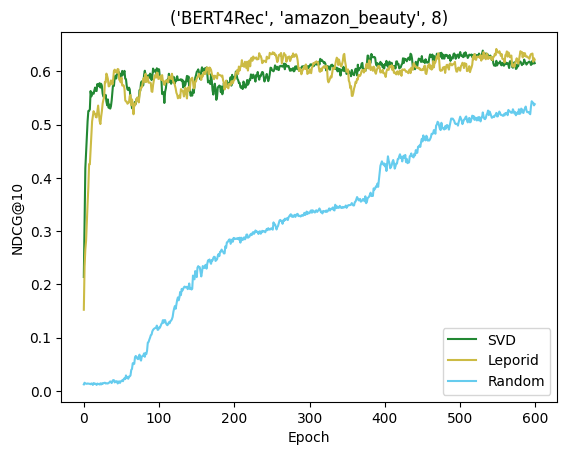

Plotting Leporid MdIFezIN7SQ7AMVi
Plotting SVD cFCQyiKrRKnT5jlZ
Plotting Random TGdE0iP3kAIjwy9l
('GRU4Rec', 'amazon_beauty', 16)


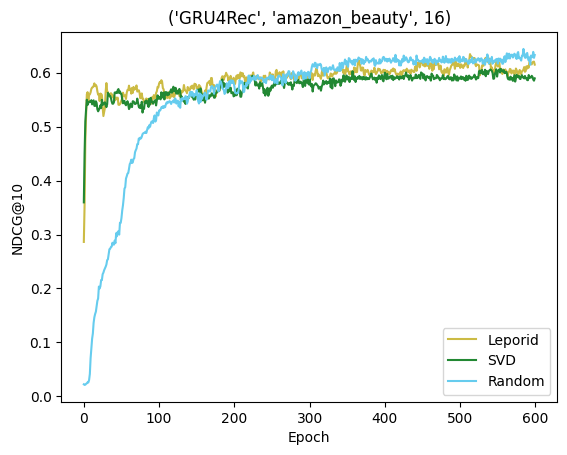

Plotting Leporid G9wqjDQ4dXJjVAyy
Plotting SVD kbn6uopfAJSoRLLA
Plotting Random aMS0FNOOTKH9zmTw
('GRU4Rec', 'amazon_beauty', 8)


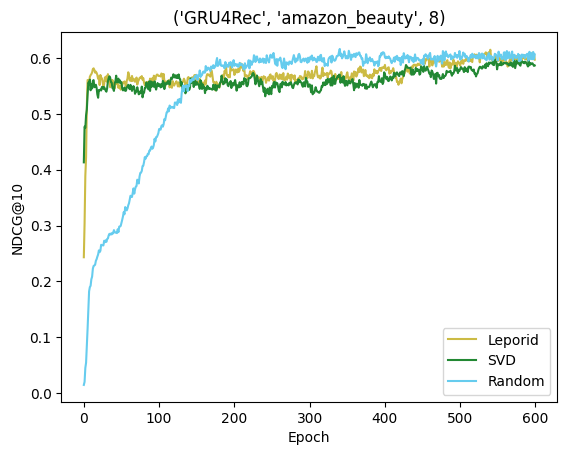

Plotting Random MIjPBTSzzJb0aBVk
Plotting SVD mJnL2pwkDBw85qIX
('GRU4Rec', 'foursquare-tky', 32)


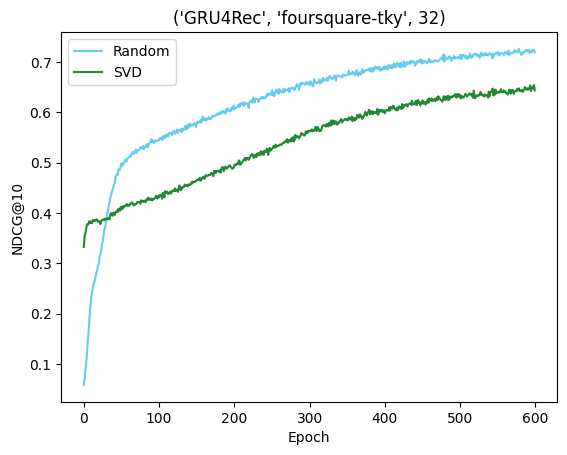

Plotting Random ApZ2h4RaCFPp4RiN
Plotting SVD oxTRLD5aeujjGzRW
('SASRec', 'foursquare-tky', 32)


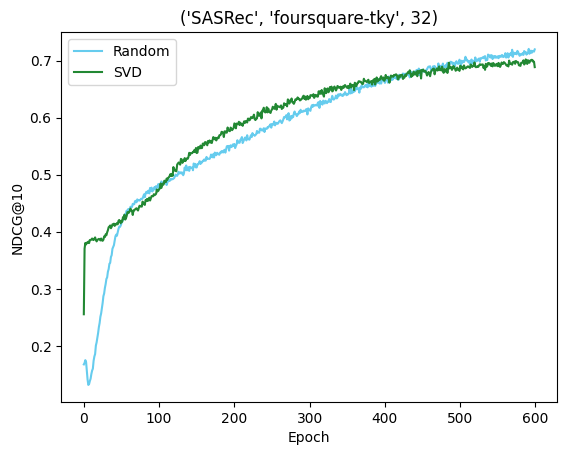

Plotting Random 8erhl9FcQN3i32Cf
Plotting SVD GTAzhb16GCeafkVG
('SASRec', 'foursquare-tky', 16)


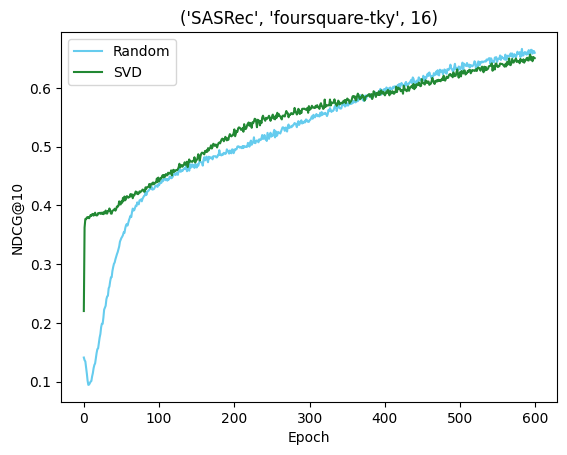

Plotting Random OmoFullNfPDr7qVO
Plotting SVD TfIAI4XgKusUQbvZ
('GRU4Rec', 'foursquare-tky', 16)


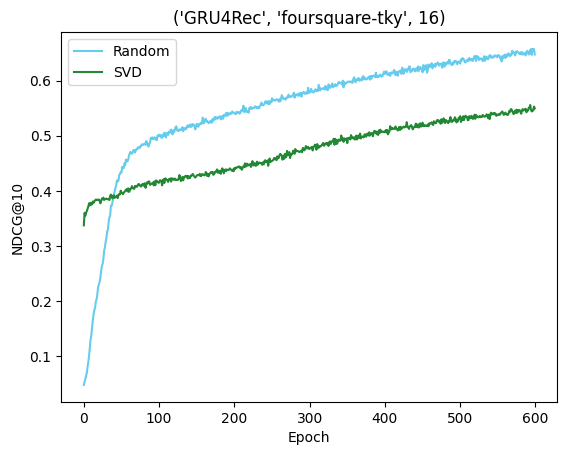

Plotting SVD JFKsbYueLvvcHnOa
Plotting Random KfjvPjvWj7cBUWwC
('SASRec', 'foursquare-tky', 8)


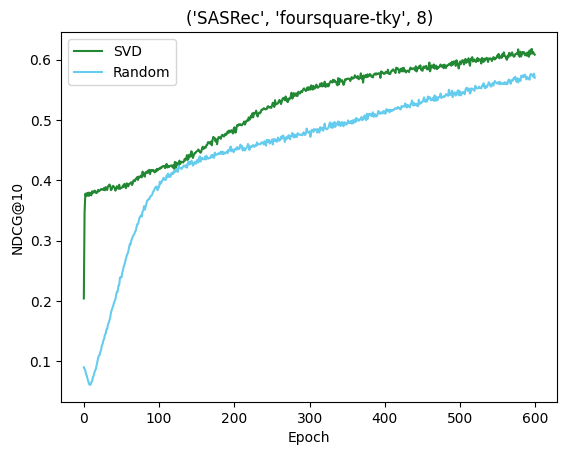

Plotting Random USv98RT7ONtWrou3
Plotting SVD BEejwsyQzUbKUUWo
('BERT4Rec', 'foursquare-tky', 32)


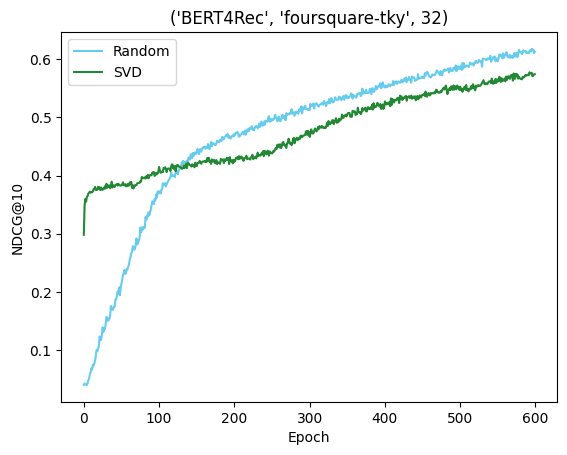

Plotting SVD l1imrIfO2qfRN7Da
Plotting Leporid pugo7oHNT205rvcd
Plotting Random wPOVKWvVSJCwdxUS
('SASRec', 'ml-1m', 64)


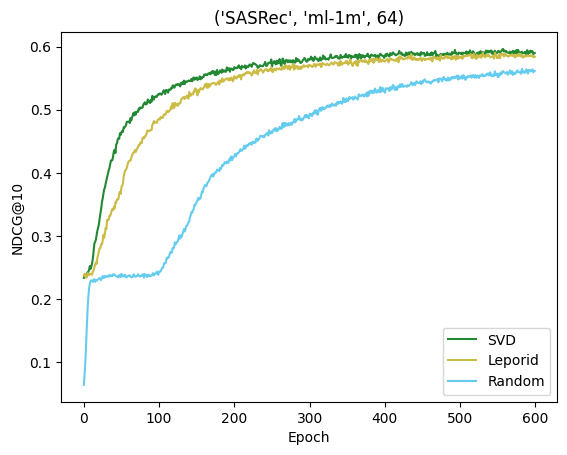

Plotting Leporid FfB5uyQ3eYgAkO1U
Plotting SVD ciyC2ChQukQQiqxP
Plotting Random dHCGeleK7Xnp1dh9
('GRU4Rec', 'ml-1m', 64)


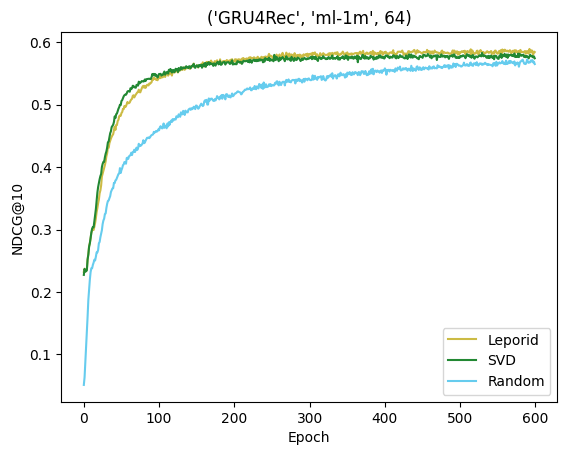

Plotting SVD CsZhSBbjbXWPzV4s
Plotting Leporid 6wvTKKaXzYUmx7UU
Plotting Random Zh6LOYajdVRzqkC8
('SASRec', 'ml-1m', 32)


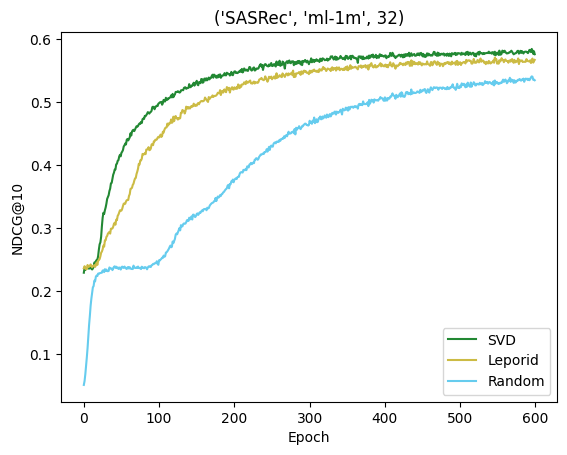

Plotting SVD 7AHCzpiSOMZVO25R
Plotting Leporid R9gYU8FwNYmFvSYK
Plotting Random v22rx89uxQGalEMZ
('GRU4Rec', 'ml-1m', 32)


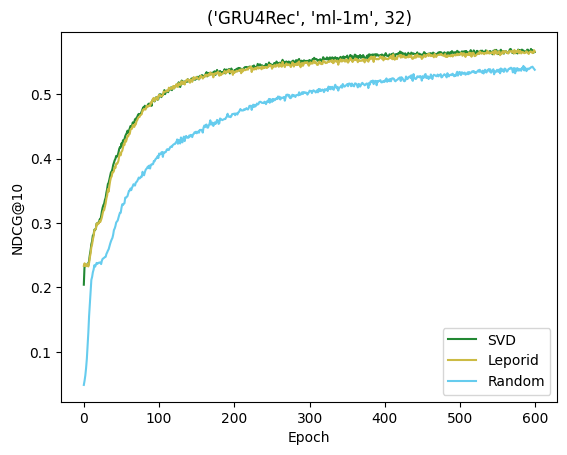

Plotting Leporid LNuQaHapc07gYd1a
Plotting SVD eYzevtFjdqfuh1Gv
Plotting Random m1n55abv5D8b8uPu
('SASRec', 'bookcrossing', 32)


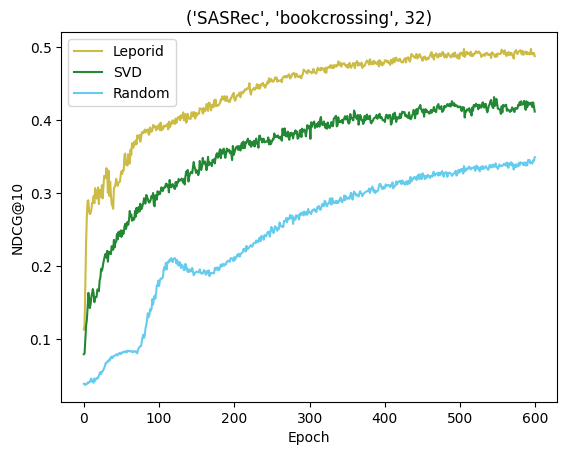

Plotting SVD CKRlZzWy0i7Pzn1u
Plotting Leporid SJfP9rVSqYzPCa7p
Plotting Random WxhifVfp9SZJQ9aD
('BERT4Rec', 'ml-1m', 64)


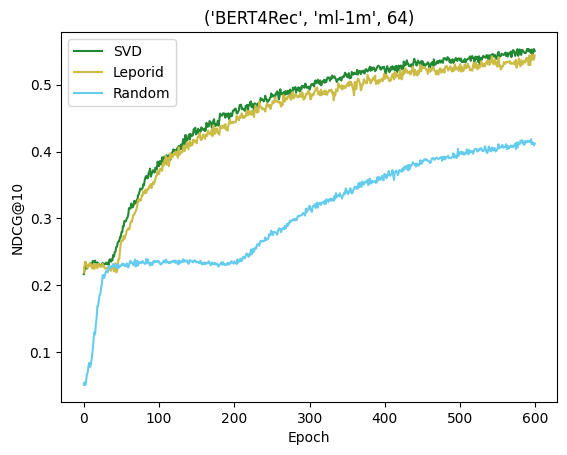

Plotting Random JnZT7FOkp4pnMD4B
Plotting SVD k72msKxVkK5hnuau
('BERT4Rec', 'foursquare-tky', 16)


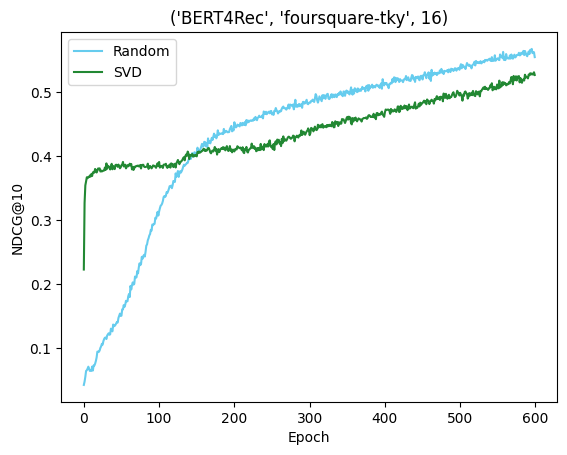

Plotting Leporid ZhOb8BMq8KgpqlJK
Plotting SVD GUY0Cs8x6YG5GC20
Plotting Random Egj11NXv3xFxFj8s
('SASRec', 'bookcrossing', 64)


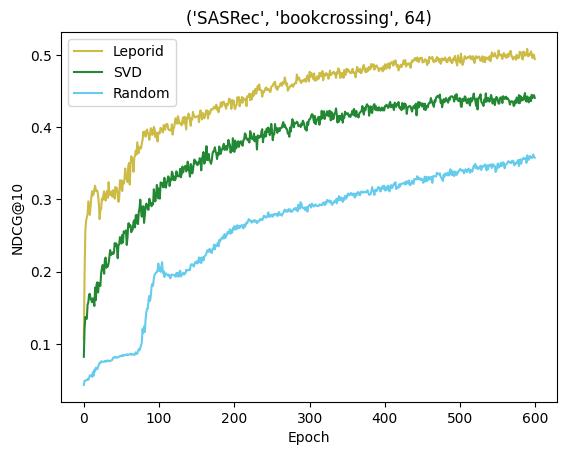

Plotting Leporid wQHBEwhDzWKTUlZa
Plotting SVD EE4o5wdHAH4UDbOb
Plotting Random JzXrweAghFFcgDVj
('SASRec', 'bookcrossing', 16)


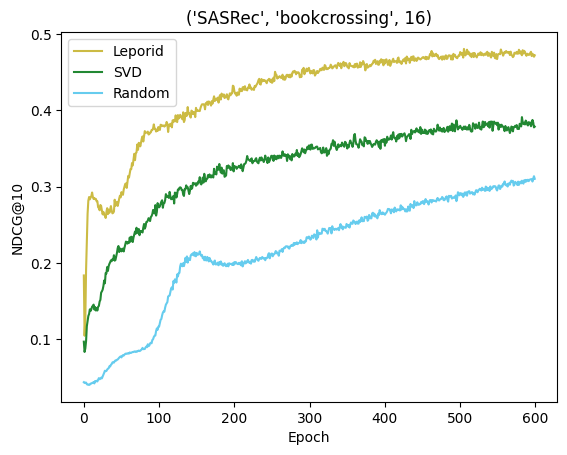

Plotting Random Hivlu9kKTqa9QBxq
Plotting SVD PMA7Ui8UTZ9SP8G6
('GRU4Rec', 'foursquare-tky', 8)


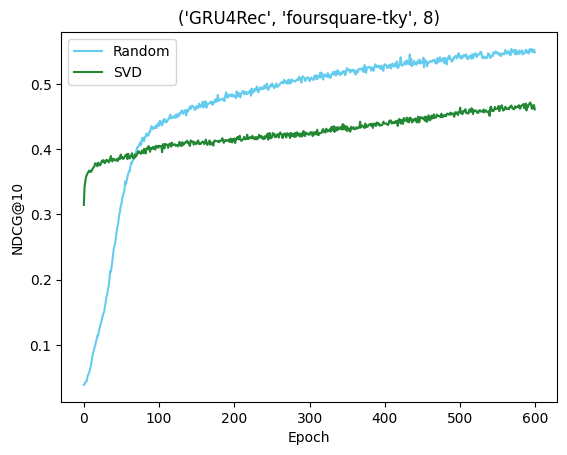

Plotting SVD Woi50mp03i9n3XYY
Plotting Leporid CeTlOEDAXmABnK3O
Plotting Random Nz91XEkWoQXcJMKJ
('SASRec', 'ml-1m', 16)


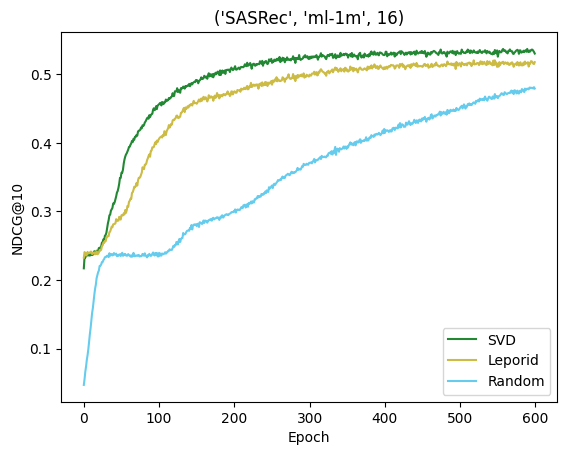

Plotting SVD y7nwjjHZTkdEa4gy
Plotting Leporid 1Wb0K6urP2pFWe8a
Plotting Random 0fw7NZEGcGg3hWnJ
('BERT4Rec', 'ml-1m', 32)


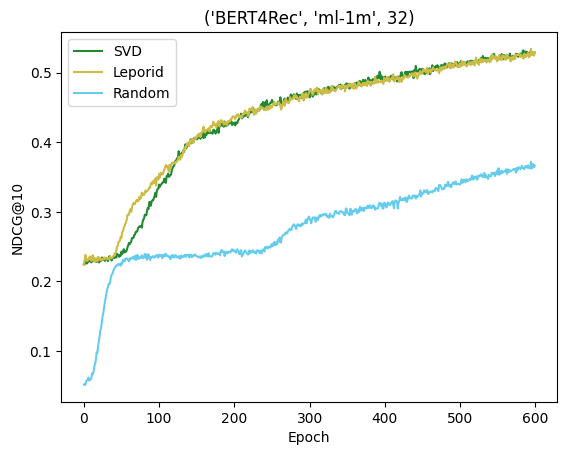

Plotting SVD G3jxrBrPIHfUBK9z
Plotting Leporid 8gXn6LYB14z1PuEb
Plotting Random 7mWPG825MfnNe85u
('GRU4Rec', 'ml-1m', 16)


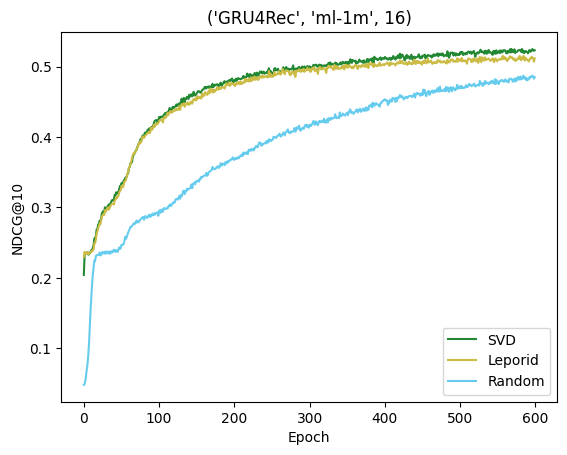

Plotting Leporid Wzz9gSEUh5hZ1DD5
Plotting Random eIit6fJcUVJdViQo
Plotting SVD HxGfeWbAygLtVd6G
('SASRec', 'behance', 64)


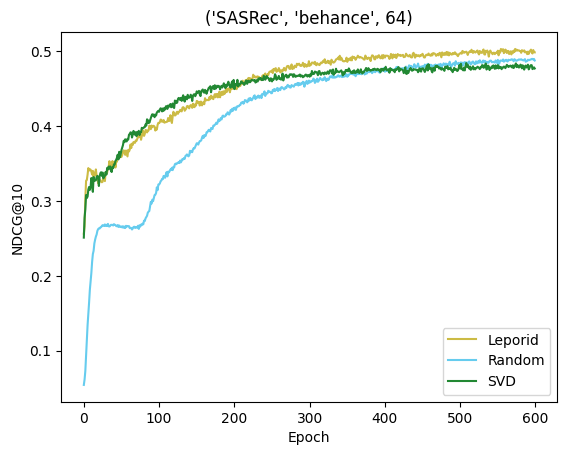

Plotting SVD is7xdkr2iQ3ewVl0
Plotting Leporid UU4bZM0zm3xdVJii
Plotting Random nzus9Gtn5IVlJAyB
('GRU4Rec', 'bookcrossing', 64)


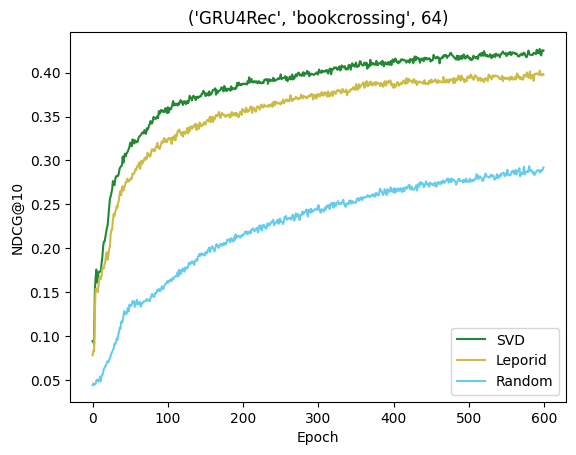

Plotting Leporid zJ7WzDW6RTS8f6ST
Plotting Random vUMGHpskWk53mhnf
Plotting SVD uYJjG1o5T21gGRn3
('SASRec', 'behance', 32)


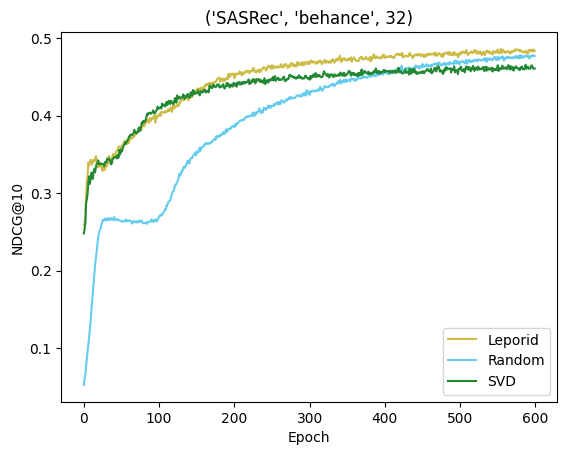

Plotting SVD 82MWkhb6WPGH79Ns
Plotting Leporid tnIQGiSHyHVAmhfv
Plotting Random M6RwAhOOr9do1nlz
('BERT4Rec', 'ml-1m', 16)


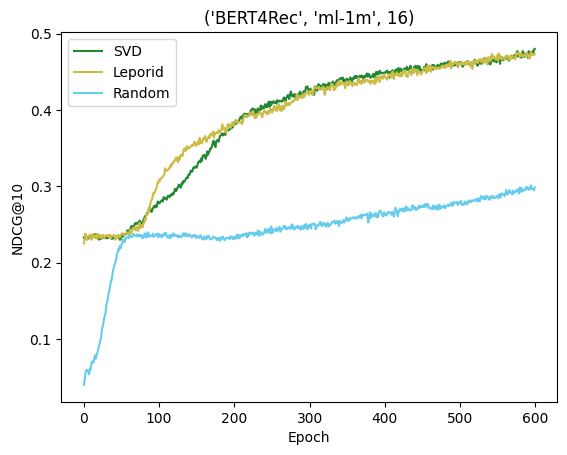

Plotting Leporid 4eQ4cWEeRXgdqa3n
Plotting Random YVYjHvlwrqaUihv5
Plotting SVD hiqlgN6w1ekzvA0d
('SASRec', 'behance', 16)


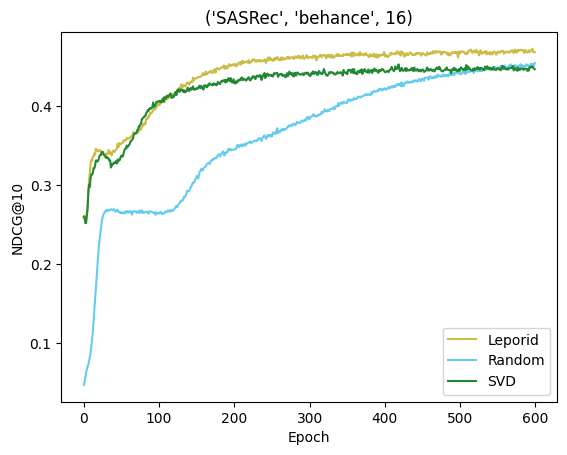

Plotting Random KGhFHPKqrDZK4ppv
Plotting SVD el0i0VUADVtBzt6D
('BERT4Rec', 'foursquare-tky', 8)


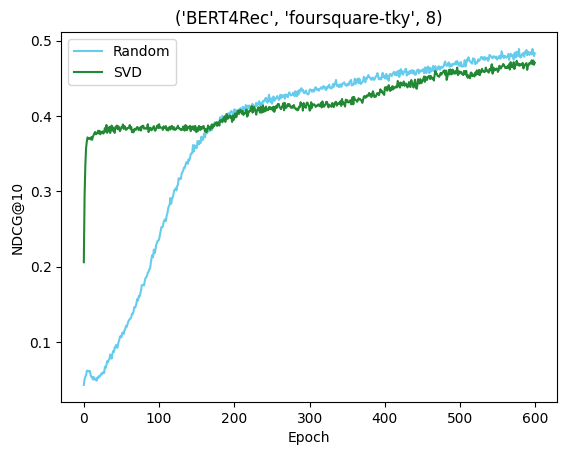

Plotting Leporid u241tFTr200MPFMF
Plotting SVD XjyedmxV4XfXhq9H
Plotting Random NaKsoGJrKj4PUqsF
('SASRec', 'bookcrossing', 8)


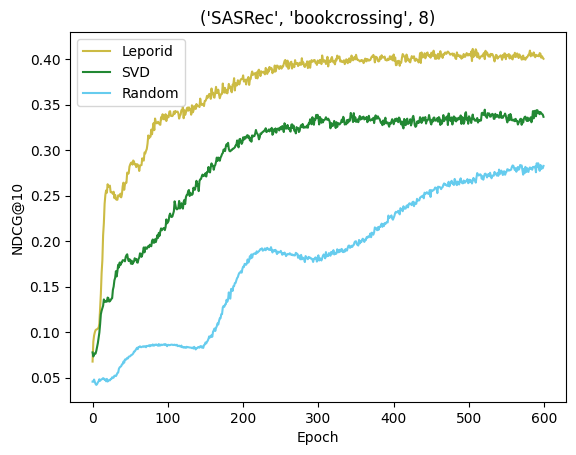

Plotting Leporid naZDTaQZwTtXvvOS
Plotting SVD C2CkDc615wmhoB0f
Plotting Random IVS6haWOwZBVqmaQ
('GRU4Rec', 'behance', 64)


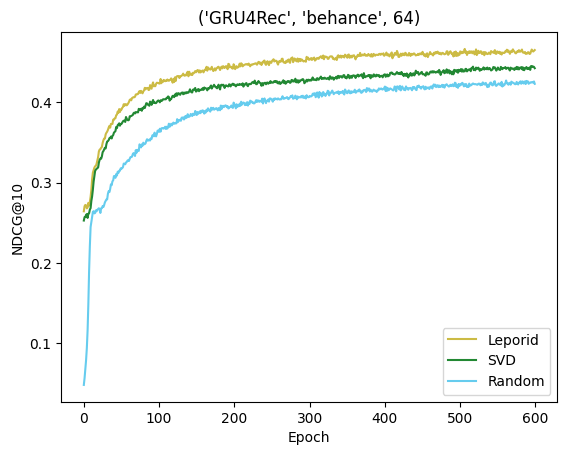

Plotting SVD wQ6tUG7PuUqVqmjy
Plotting Leporid IMfuH0E6ZccnwxIt
Plotting Random 46iJeLjsLpNKIEtr
('GRU4Rec', 'bookcrossing', 32)


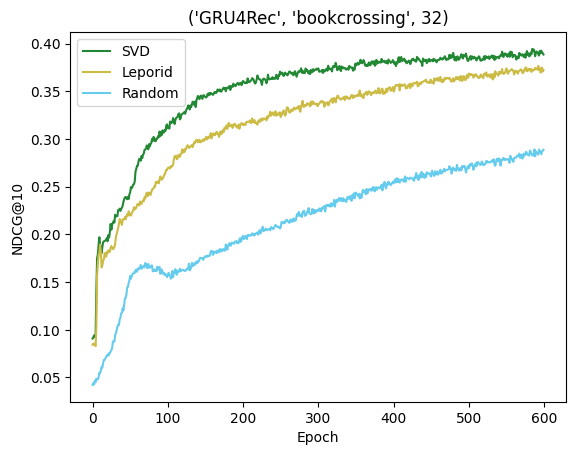

Plotting Leporid cNj3vCeDWiTDVf5h
Plotting SVD Y6hMMnkvPJQYzy57
Plotting Random ie8nuXmgFg3l5y09
('GRU4Rec', 'behance', 32)


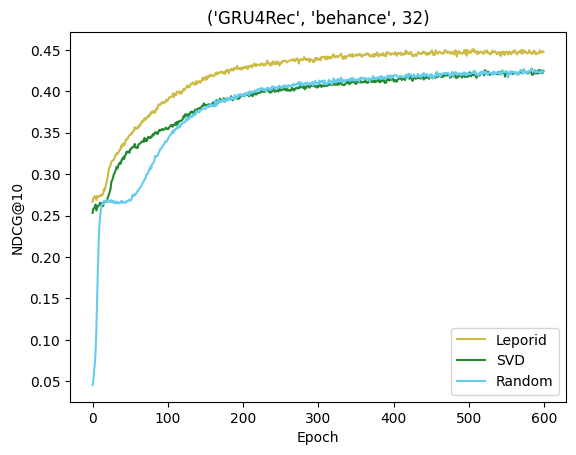

Plotting SVD PnVHMKMgPKt35L6S
Plotting Leporid t1q767VGY24D08CZ
Plotting Random O3DCmnflXAWakYq3
('SASRec', 'ml-1m', 8)


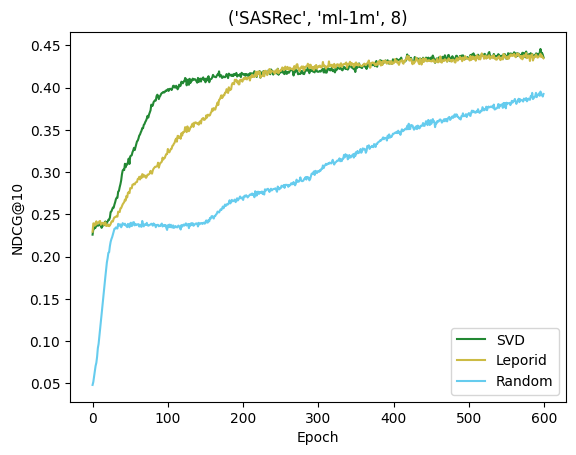

Plotting Leporid fAIMPiTDVFtKuQnO
Plotting SVD tkqHJ2zYsf4QjbCi
Plotting Random z0tr3dqSjhi5O43o
('BERT4Rec', 'bookcrossing', 64)


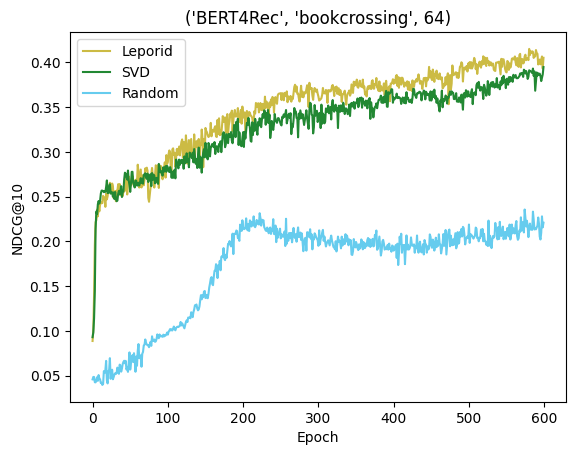

Plotting SVD m2JIfNA5osL2DHl8
Plotting Leporid yEJterKr9TiMQKLE
Plotting Random xfkclA25mTE3Glou
('GRU4Rec', 'ml-1m', 8)


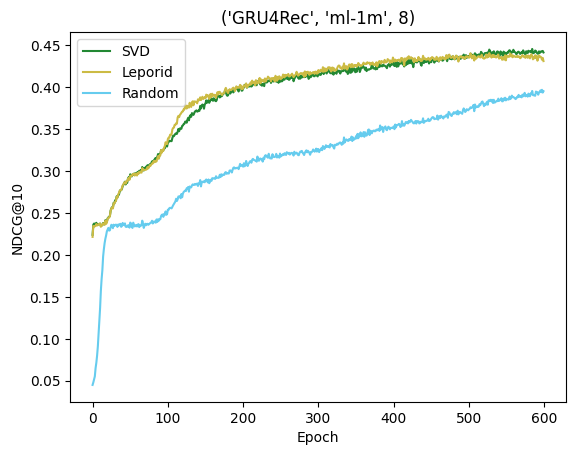

Plotting Leporid QW5oCKgWg4nu1PS9
Plotting SVD Cxjc96JKlpQDLgf1
('BERT4Rec', 'behance', 64)


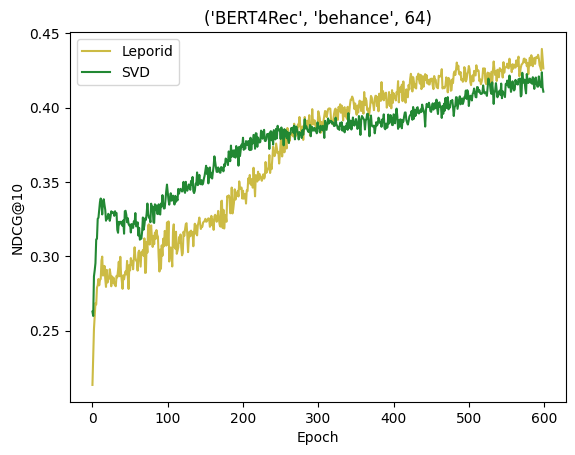

Plotting Leporid LkCzzCsWiaNkiovg
Plotting SVD im3p2yXV0niEPj3i
Plotting Random 9CQacRPKMV2IFrc4
('SASRec', 'behance', 8)


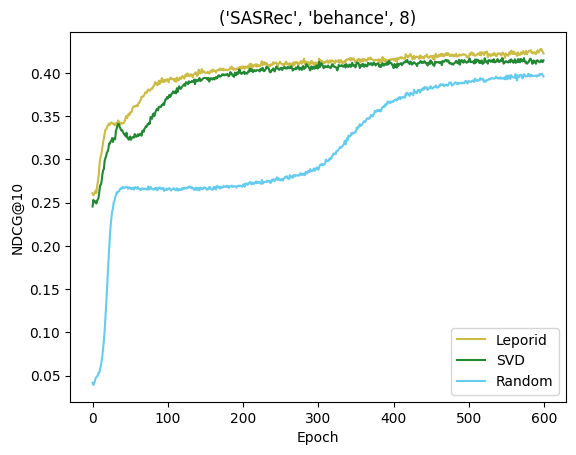

Plotting Leporid 4fOfa5TjXUWNahxQ
Plotting Random Cejr52aqrkDowdry
Plotting SVD KSHioxP6LrRbq1De
('GRU4Rec', 'behance', 16)


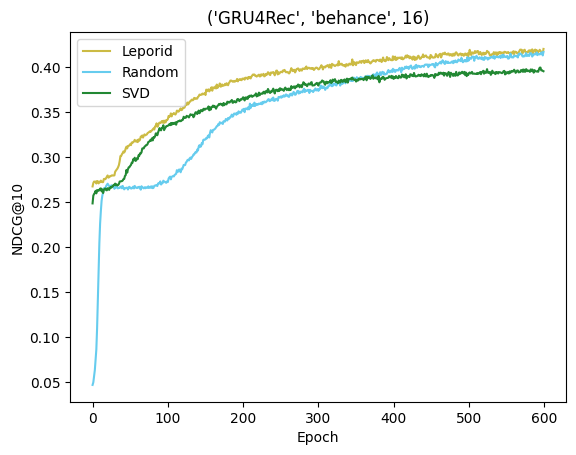

Plotting SVD JyZozjDXwUy9j9PY
Plotting Leporid l2DtVmjwsM9me1Bp
Plotting Random 0152Oxfow4fJkHeI
('GRU4Rec', 'bookcrossing', 16)


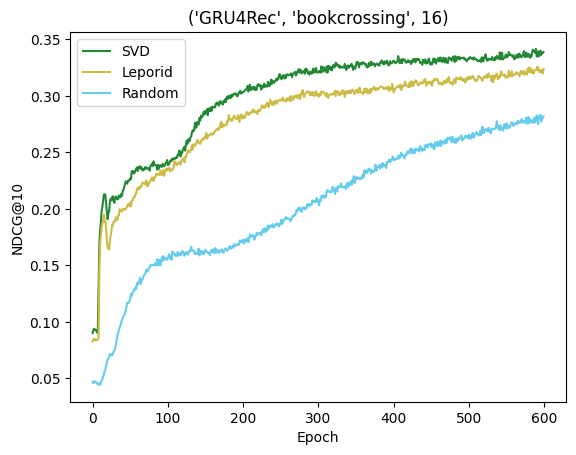

Plotting Leporid aqiXxWC4GoUGlLiS
Plotting SVD HdsL66YWk9SkjEa1
Plotting Random yoGGs3FmvQVdwqO6
('BERT4Rec', 'behance', 32)


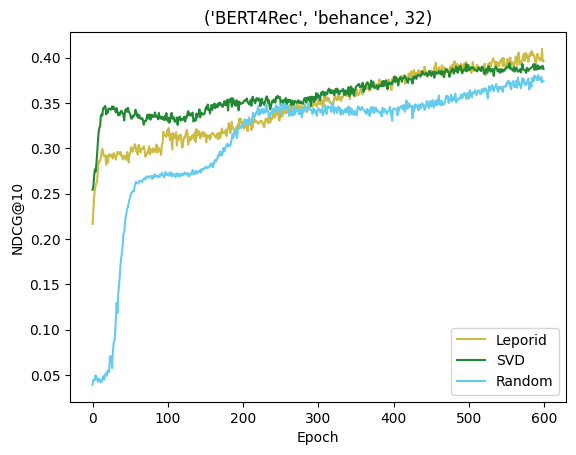

Plotting Leporid HLzhdA5NkBYgyVHi
Plotting SVD bWHXOyv4mxkjvkCy
Plotting Random Qjr14KJKcb6g6kms
('BERT4Rec', 'ml-1m', 8)


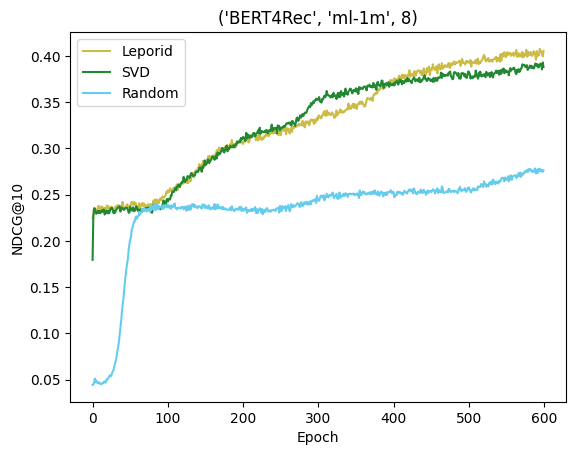

Plotting Leporid zxOlEAeF24xIHCB4
Plotting SVD LqhvNy38EnJeGgNM
Plotting Random iewe4hzBWRCobyP1
('BERT4Rec', 'bookcrossing', 32)


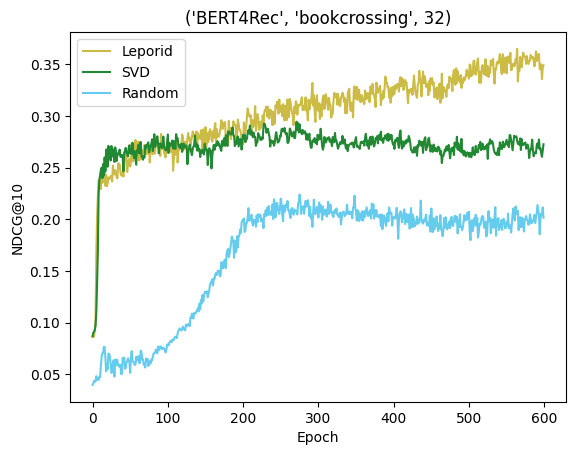

Plotting Leporid zRmph5GxFmDBPXJH
Plotting SVD ZjiPpQysvLi9k3pJ
Plotting Random TH7WxHQIYVFJSw20
('GRU4Rec', 'behance', 8)


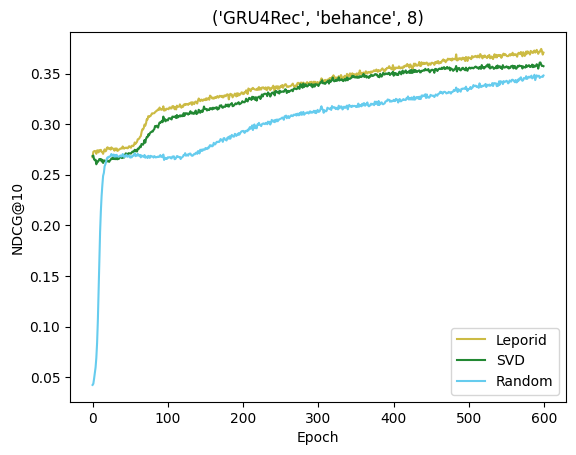

Plotting SVD XviF7yQ3c7jVmqL6
Plotting Leporid 3hyDnNUr37kgBOVn
Plotting Random Gv9HIOrhgiHMaWca
('BERT4Rec', 'behance', 16)


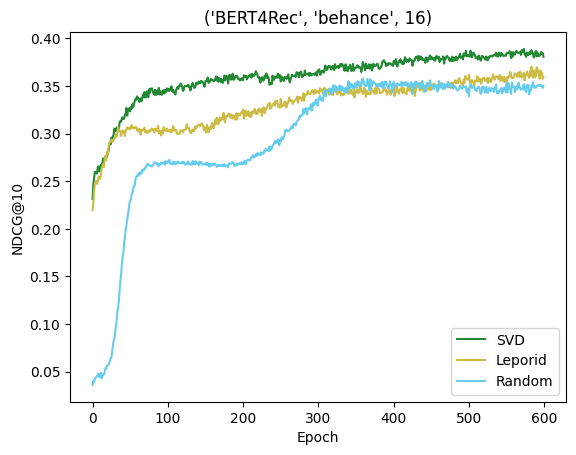

Plotting SVD cGmec5Q8ymKB9jzU
Plotting Leporid EuBeWzIa7N3MfK2A
Plotting Random P7KZfyVimF2QvjKR
('BERT4Rec', 'behance', 8)


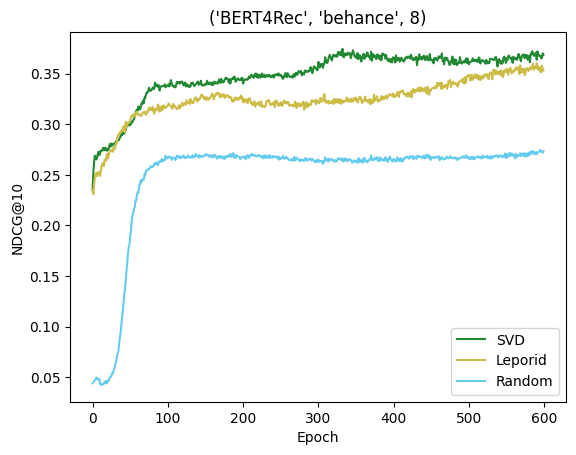

Plotting Leporid k2Z1yrtyZZAcxheg
Plotting SVD 8xNloRV2DuLzUbZq
Plotting Random 2JC7Ltr8GOnX9a1g
('BERT4Rec', 'bookcrossing', 16)


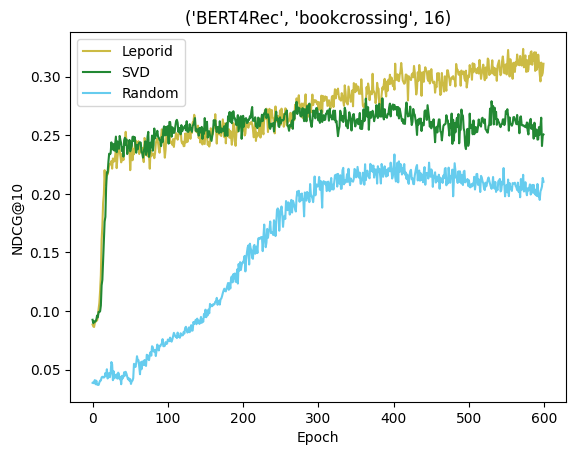

Plotting Random NKh6csTOiSxvKls4
Plotting Leporid PQ12CVAj2y4FeYGD
Plotting SVD tBjCY8AkUbe8RAD6
('GRU4Rec', 'bookcrossing', 8)


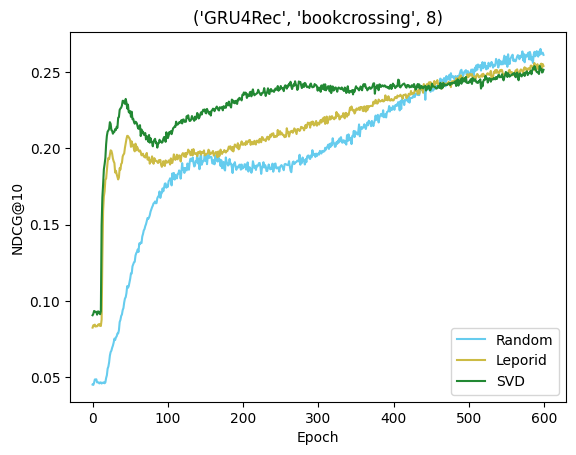

Plotting Leporid 73vXl395mF0L3SsY
Plotting SVD oevtkWQYGMJIoDDG
Plotting Random 5zb80GZniusLXGFM
('BERT4Rec', 'bookcrossing', 8)


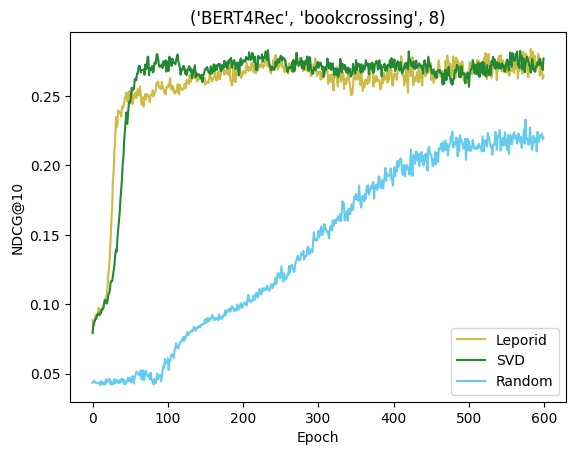

In [18]:
# Plot the metrics

for exp_subset_keys, exp_ids in separated_exps.items():
    to_remove = ["Leporid (cutoff)", "SVD (cutoff)"]

    already_plotted = set()

    plt.figure()
    for exp_id, values in exps_metrics.items():
        if exp_id not in exp_ids:
            continue
        label = conf_name[exp_id]
        if label in to_remove or label in already_plotted:
            continue
        already_plotted.add(label)
        print(f"Plotting {label}",exp_id)
        plt.plot(values, label=label, color=color_map[label])
        # annotate the best value
        best_value = test_metrics[exp_id]
        #plt.annotate(f"{label} best:{best_value:.4f}", (200,0.1+len(already_plotted)/10))
    #plt.xlim(0,500)
    #plt.xscale("log")
    plt.title(f"{exp_subset_keys}")
    print(f"{exp_subset_keys}")
    plt.xlabel("Epoch")
    plt.ylabel(test_metric[3:].split("/")[0].replace("_",""))
    plt.legend()
    plt.show()

In [19]:
for exp_id in ['z0tr3dqSjhi5O43o','tkqHJ2zYsf4QjbCi','fAIMPiTDVFtKuQnO']:
     config_file = os.path.join(exp_folder, f"{exp_id}.json")
     with open(config_file, "r") as f:
        single_conf = json.load(f)
     #print(single_conf)
     print(exp_id," ---",conf_name[exp_id], "---", single_conf['model']['rec_model']['name'], "---", single_conf['data_params']['name'], "---", single_conf['model']['rec_model']['emb_size'])
     print("lookback:",single_conf['data_params']['collator_params']['lookback'])
     print("learning_rate:",single_conf['model']['optimizer']['params']['lr'])
     if single_conf['model']['rec_model']['name'] == 'SASRec':
         print("dropout_rate:",single_conf['model']['rec_model']['dropout_rate'])
         print("num_blocks:",single_conf['model']['rec_model']['num_blocks'])
         print("num_heads:",single_conf['model']['rec_model']['num_heads'])
     elif single_conf['model']['rec_model']['name'] == 'BERT4Rec':
         print("dropout_rate:",single_conf['model']['rec_model']['dropout_rate'])
         print("num_blocks:",single_conf['model']['rec_model']['bert_num_blocks'])
         print("num_heads:",single_conf['model']['rec_model']['bert_num_heads'])
     elif single_conf['model']['rec_model']['name'] == 'GRU4Rec':
         print("dropout_input:",single_conf['model']['rec_model']['dropout_input'])
         print("num layers:",single_conf['model']['rec_model']['num_layers'])
     print("\n")


z0tr3dqSjhi5O43o  --- Random --- BERT4Rec --- bookcrossing --- 64
lookback: 50
learning_rate: 0.001
dropout_rate: 0.4
num_blocks: 1
num_heads: 1


tkqHJ2zYsf4QjbCi  --- SVD --- BERT4Rec --- bookcrossing --- 64
lookback: 100
learning_rate: 0.001
dropout_rate: 0.30000000000000004
num_blocks: 1
num_heads: 2


fAIMPiTDVFtKuQnO  --- Leporid --- BERT4Rec --- bookcrossing --- 64
lookback: 100
learning_rate: 0.001
dropout_rate: 0.2
num_blocks: 1
num_heads: 2




In [38]:
import pandas as pd

def create_table(results):

    data = []

    for model_dataset, sub_results in results.items():
        for initializations in sub_results:
            for init, best in initializations.items():
                # Aggiungere una riga con chiave esterna, interna e valore
                data.append({'Model-Dataset': model_dataset, 'Initialization': init, 'NDCG': float(best)})

    # Creare un DataFrame a partire dai dati
    df = pd.DataFrame(data)

    # Creare una tabella pivot con chiave esterna come indice e chiave interna come colonne
    table = df.pivot(index='Model-Dataset', columns='Initialization', values='NDCG')

    columns_order = ['Random', 'SVD', 'SVD (cutoff)', 'Leporid']
    out_table = table.reindex(columns=columns_order)

    return out_table


In [39]:
### TABLE

results = {}

for exp_subset_keys, exp_ids in separated_exps.items():
    to_remove = ["Leporid (cutoff)"]
    already_plotted = set()
    for exp_id, values in exps_metrics.items():
        if exp_id not in exp_ids:
            continue
        label = conf_name[exp_id]
        if label in to_remove or label in already_plotted:
            continue
        already_plotted.add(label)
        
        best_value = test_metrics[exp_id]
        
        if f"{exp_subset_keys}" not in results.keys():
            results[f"{exp_subset_keys}"] = []
        if f"{label}" not in results[f"{exp_subset_keys}"]:
            results[f"{exp_subset_keys}"].append({f"{label}":f"{best_value:.4f}"})

for key in results.keys():
    print(key)

#plt.ylabel(main_metric[3:].split("/")[0].replace("_",""))
    

('SASRec', 'ml-1m', 64)
('GRU4Rec', 'ml-1m', 64)
('BERT4Rec', 'ml-1m', 64)
('SASRec', 'bookcrossing', 64)
('GRU4Rec', 'bookcrossing', 64)
('SASRec', 'behance', 64)
('GRU4Rec', 'behance', 64)
('BERT4Rec', 'bookcrossing', 64)
('BERT4Rec', 'behance', 64)


In [40]:
table = create_table(results)

# Function to highlight the best value in each row
def highlight_best(s):
    is_best = s == s.max()
    return ['font-weight: bold; color: red;' if v else '' for v in is_best]

# Apply the highlighting function to the DataFrame
styled_df = table.style.apply(highlight_best, axis=1)

# Display the styled DataFrame
styled_df 

Initialization,Random,SVD,SVD (cutoff),Leporid
Model-Dataset,,,,
"('BERT4Rec', 'behance', 64)",0.381800,0.393600,0.397700,0.419100
"('BERT4Rec', 'bookcrossing', 64)",0.226800,0.363400,0.396600,0.393300
"('BERT4Rec', 'ml-1m', 64)",0.420600,0.543100,0.548400,0.541300
"('GRU4Rec', 'behance', 64)",0.418300,0.433200,0.407700,0.456800
"('GRU4Rec', 'bookcrossing', 64)",0.286400,0.425200,0.363600,0.394100
"('GRU4Rec', 'ml-1m', 64)",0.569800,0.579000,0.583900,0.586100
"('SASRec', 'behance', 64)",0.479100,0.480500,0.493700,0.493400
"('SASRec', 'bookcrossing', 64)",0.363100,0.441400,0.470100,0.497300
"('SASRec', 'ml-1m', 64)",0.564000,0.590000,0.576000,0.583600


### FULL TABLE

In [41]:
# Inside each folder of folder, load the metrics.csv and get the complete column
exps_metrics = {}

val_column = f"{main_metric}_0"

metrics_names = ["F1", "NDCG"]
metrics_ks = [5, 10, 20]

column_labels = ([f"{metric}_@{k}" for metric in metrics_names for k in metrics_ks])
#test_columns = [f"val_{metric}/dataloader_idx_1" for metric in column_labels]
test_metrics = {}

for exp_id,_ in top_k_exps:
    metrics_file = os.path.join(log_folder, exp_id, "lightning_logs", "version_0", "metrics.csv")
    df = pd.read_csv(metrics_file)
    # get last value of column that is not nan
    current_exp_metrics = {}
    current_test_metrics = {}
    for metric_label in column_labels:
        test_column = f"val_{metric_label}/dataloader_idx_1" 
        column_values = df[test_column]
        current_exp_metrics[metric_label] = column_values.dropna().to_numpy()
        current_test_metrics[metric_label] = column_values[df[val_column].argmax()]


    exps_metrics[exp_id] = current_exp_metrics
    test_metrics[exp_id] = current_test_metrics

In [42]:
### TABLE

results = {}
for exp_subset_keys, exp_ids in separated_exps.items():
    to_remove = ["Leporid (cutoff)"]
    already_plotted = set()
    for exp_id, values in exps_metrics.items():
        if exp_id not in exp_ids:
            continue
        label = conf_name[exp_id]
        if label in to_remove or label in already_plotted:
            continue
        already_plotted.add(label)
        
        best_values = {}
        for metric_label in column_labels:
            best_values[metric_label] = test_metrics[exp_id][metric_label]
        #best_value = test_metrics[exp_id]
        
        if f"{exp_subset_keys}" not in results.keys():
            results[f"{exp_subset_keys}"] = []
        if f"{label}" not in results[f"{exp_subset_keys}"]:

            bests = []
            for  metric_label in column_labels:
                bests.append({f"{metric_label}":f"{best_values[metric_label]:.4f}"})
            results[f"{exp_subset_keys}"].append({f"{label}":bests})    

In [43]:
def remove_svd_cutoff(results):
    keys_to_modify = {('SASRec', 'ml-1m', 64), ('BERT4Rec', 'ml-1m', 64), ('GRU4Rec', 'ml-1m', 64)}
    
    for key in keys_to_modify:
        key_str = str(key)  # Convertiamo la tupla in stringa per corrispondenza con le chiavi del dizionario
        if key_str in results:
            results[key_str] = [model for model in results[key_str] if 'SVD (cutoff)' not in model]
    
    return results

In [44]:
results = remove_svd_cutoff(results)
results

{"('SASRec', 'ml-1m', 64)": [{'SVD': [{'F1_@5': '0.2221'},
    {'F1_@10': '0.1411'},
    {'F1_@20': '0.0827'},
    {'NDCG_@5': '0.5572'},
    {'NDCG_@10': '0.5900'},
    {'NDCG_@20': '0.6106'}]},
  {'Leporid': [{'F1_@5': '0.2145'},
    {'F1_@10': '0.1380'},
    {'F1_@20': '0.0817'},
    {'NDCG_@5': '0.5505'},
    {'NDCG_@10': '0.5836'},
    {'NDCG_@20': '0.6035'}]},
  {'Random': [{'F1_@5': '0.1803'},
    {'F1_@10': '0.1219'},
    {'F1_@20': '0.0756'},
    {'NDCG_@5': '0.5297'},
    {'NDCG_@10': '0.5640'},
    {'NDCG_@20': '0.5862'}]}],
 "('GRU4Rec', 'ml-1m', 64)": [{'Leporid': [{'F1_@5': '0.2245'},
    {'F1_@10': '0.1426'},
    {'F1_@20': '0.0833'},
    {'NDCG_@5': '0.5529'},
    {'NDCG_@10': '0.5861'},
    {'NDCG_@20': '0.6073'}]},
  {'SVD': [{'F1_@5': '0.2234'},
    {'F1_@10': '0.1424'},
    {'F1_@20': '0.0832'},
    {'NDCG_@5': '0.5432'},
    {'NDCG_@10': '0.5790'},
    {'NDCG_@20': '0.6013'}]},
  {'Random': [{'F1_@5': '0.2083'},
    {'F1_@10': '0.1358'},
    {'F1_@20': '0.0810'},
 

In [45]:
import ast

rows = []
for outer_key, models in results.items():
    for model_dict in models:
        for model_name, metrics_list in model_dict.items():
            metrics = {list(metric.keys())[0]: list(metric.values())[0] for metric in metrics_list}
            rows.append((outer_key, model_name, *metrics.values()))

columns = ["Model", "Initialization"] + list(metrics.keys())

    # Creazione del DataFrame MultiIndex
df = pd.DataFrame(rows, columns=columns)
df.set_index(["Model", "Initialization"], inplace=True)


df.reset_index(inplace=True) 
df['Model'] = df['Model'].apply(ast.literal_eval)
df[['Dataset', 'Model']] = df['Model'].apply(lambda x: pd.Series([x[1], x[0]]))  


df.set_index(['Dataset', 'Model', 'Initialization'], inplace=True) 
df.sort_index(level=['Dataset', 'Model', 'Initialization'])  


init_order = ['Random', 'Leporid', 'SVD', 'SVD (cutoff)']
model_order= ['SASRec', 'BERT4Rec', 'GRU4Rec']
df.index = df.index.set_levels([
   df.index.levels[0],  
   pd.Categorical(df.index.levels[1], categories=model_order, ordered=True), 
   pd.Categorical(df.index.levels[2], categories=init_order, ordered=True)  
])

df = df.sort_index(level=['Dataset', 'Model', 'Initialization'])
df

F1_@5  F1_@10  F1_@20 NDCG_@5 NDCG_@10  \
Dataset      Model    Initialization                                            
behance      SASRec   Random          0.1586  0.1075  0.0675  0.4445   0.4791   
                      Leporid         0.1751  0.1163  0.0720  0.4597   0.4934   
                      SVD             0.1748  0.1172  0.0727  0.4420   0.4805   
                      SVD (cutoff)    0.1767  0.1176  0.0725  0.4581   0.4937   
             BERT4Rec Random          0.1238  0.0894  0.0590  0.3416   0.3818   
                      Leporid         0.1424  0.1004  0.0652  0.3782   0.4191   
                      SVD             0.1448  0.0995  0.0639  0.3561   0.3936   
                      SVD (cutoff)    0.1462  0.1001  0.0641  0.3606   0.3977   
             GRU4Rec  Random          0.1516  0.1041  0.0660  0.3817   0.4183   
                      Leporid         0.1728  0.1160  0.0719  0.4201   0.4568   
                      SVD             0.1647  0.1115  0.0697  0.3960   0.4332   
                      SVD (cutoff)    0.1549  0.1067  0.0677  0.3679   0.4077   
bookcrossing SASRec   Random          0.1053  0.0797  0.0566  0.3187   0.3631   
                      Leporid         0.1764  0.1226  0.0766  0.4565   0.4973   
                      SVD             0.1444  0.1059  0.0697  0.3966   0.4414   
                      SVD (cutoff)    0.1607  0.1144  0.0733  0.4276   0.4701   
             BERT4Rec Random          0.0642  0.0509  0.0387  0.1907   0.2268   
                      Leporid         0.1199  0.0887  0.0602  0.3431   0.3933   
                      SVD             0.1136  0.0853  0.0581  0.3177   0.3634   
                      SVD (cutoff)    0.1259  0.0932  0.0630  0.3508   0.3966   
             GRU4Rec  Random          0.0859  0.0657  0.0481  0.2484   0.2864   
                      Leporid         0.1397  0.1022  0.0671  0.3487   0.3941   
                      SVD             0.1527  0.1082  0.0691  0.3838   0.4252   
                      SVD (cutoff)    0.1252  0.0934  0.0629  0.3177   0.3636   
ml-1m        SASRec   Random          0.1803  0.1219  0.0756  0.5297   0.5640   
                      Leporid         0.2145  0.1380  0.0817  0.5505   0.5836   
                      SVD             0.2221  0.1411  0.0827  0.5572   0.5900   
             BERT4Rec Random          0.1259  0.0966  0.0667  0.3667   0.4206   
                      Leporid         0.1883  0.1277  0.0784  0.5015   0.5413   
                      SVD             0.1911  0.1289  0.0789  0.5068   0.5431   
             GRU4Rec  Random          0.2083  0.1358  0.0810  0.5355   0.5698   
                      Leporid         0.2245  0.1426  0.0833  0.5529   0.5861   
                      SVD             0.2234  0.1424  0.0832  0.5432   0.5790   

                                     NDCG_@20  
Dataset      Model    Initialization           
behance      SASRec   Random           0.5058  
                      Leporid          0.5201  
                      SVD              0.5071  
                      SVD (cutoff)     0.5197  
             BERT4Rec Random           0.4154  
                      Leporid          0.4501  
                      SVD              0.4252  
                      SVD (cutoff)     0.4273  
             GRU4Rec  Random           0.4490  
                      Leporid          0.4858  
                      SVD              0.4621  
                      SVD (cutoff)     0.4383  
bookcrossing SASRec   Random           0.4037  
                      Leporid          0.5236  
                      SVD              0.4703  
                      SVD (cutoff)     0.4978  
             BERT4Rec Random           0.2664  
                      Leporid          0.4261  
                      SVD              0.3956  
                      SVD (cutoff)     0.4309  
             GRU4Rec  Random           0.3253  
                      Leporid          0.4264  
                      SVD              0.4535  
   

In [46]:
import pandas as pd
import numpy as np 

# MERGE SVD AND SVD CUTOFF
def merge_svd_cutoff(df):
    df = df.reset_index()
    
    svd_df = df[df['Initialization'] == 'SVD']
    svd_cutoff_df = df[df['Initialization'] == 'SVD (cutoff)']
    
    merged_df = svd_df.set_index(['Dataset', 'Model']).combine(
        svd_cutoff_df.set_index(['Dataset', 'Model']),
        func=lambda s1, s2: s1.where(s2.isna(), s1.where(s1 >= s2, s2))  
    ).reset_index()
    
    merged_df['Initialization'] = 'SVD'
    df = df[~df['Initialization'].isin(['SVD', 'SVD (cutoff)'])]

    df = pd.concat([df, merged_df], ignore_index=True)

    df.set_index(['Dataset', 'Model', 'Initialization'], inplace=True) 
    df.sort_index(level=['Dataset', 'Model', 'Initialization'])  

    init_order = ['Random', 'Leporid', 'SVD', 'SVD (cutoff)', 'SVD new']
    model_order= ['SASRec', 'BERT4Rec', 'GRU4Rec']
    df.index = df.index.set_levels([
        df.index.levels[0],  
        pd.Categorical(df.index.levels[1], categories=model_order, ordered=True), 
        pd.Categorical(df.index.levels[2], categories=init_order, ordered=True)  
    ])

    df = df.sort_index(level=['Dataset', 'Model', 'Initialization'])                
    return df


merged_df = merge_svd_cutoff(df)

merged_df

F1_@5  F1_@10  F1_@20 NDCG_@5 NDCG_@10  \
Dataset      Model    Initialization                                            
behance      SASRec   Random          0.1586  0.1075  0.0675  0.4445   0.4791   
                      Leporid         0.1751  0.1163  0.0720  0.4597   0.4934   
                      SVD             0.1767  0.1176  0.0727  0.4581   0.4937   
             BERT4Rec Random          0.1238  0.0894  0.0590  0.3416   0.3818   
                      Leporid         0.1424  0.1004  0.0652  0.3782   0.4191   
                      SVD             0.1462  0.1001  0.0641  0.3606   0.3977   
             GRU4Rec  Random          0.1516  0.1041  0.0660  0.3817   0.4183   
                      Leporid         0.1728  0.1160  0.0719  0.4201   0.4568   
                      SVD             0.1647  0.1115  0.0697  0.3960   0.4332   
bookcrossing SASRec   Random          0.1053  0.0797  0.0566  0.3187   0.3631   
                      Leporid         0.1764  0.1226  0.0766  0.4565   0.4973   
                      SVD             0.1607  0.1144  0.0733  0.4276   0.4701   
             BERT4Rec Random          0.0642  0.0509  0.0387  0.1907   0.2268   
                      Leporid         0.1199  0.0887  0.0602  0.3431   0.3933   
                      SVD             0.1259  0.0932  0.0630  0.3508   0.3966   
             GRU4Rec  Random          0.0859  0.0657  0.0481  0.2484   0.2864   
                      Leporid         0.1397  0.1022  0.0671  0.3487   0.3941   
                      SVD             0.1527  0.1082  0.0691  0.3838   0.4252   
ml-1m        SASRec   Random          0.1803  0.1219  0.0756  0.5297   0.5640   
                      Leporid         0.2145  0.1380  0.0817  0.5505   0.5836   
                      SVD             0.2221  0.1411  0.0827  0.5572   0.5900   
             BERT4Rec Random          0.1259  0.0966  0.0667  0.3667   0.4206   
                      Leporid         0.1883  0.1277  0.0784  0.5015   0.5413   
                      SVD             0.1911  0.1289  0.0789  0.5068   0.5431   
             GRU4Rec  Random          0.2083  0.1358  0.0810  0.5355   0.5698   
                      Leporid         0.2245  0.1426  0.0833  0.5529   0.5861   
                      SVD             0.2234  0.1424  0.0832  0.5432   0.5790   

                                     NDCG_@20  
Dataset      Model    Initialization           
behance      SASRec   Random           0.5058  
                      Leporid          0.5201  
                      SVD              0.5197  
             BERT4Rec Random           0.4154  
                      Leporid          0.4501  
                      SVD              0.4273  
             GRU4Rec  Random           0.4490  
                      Leporid          0.4858  
                      SVD              0.4621  
bookcrossing SASRec   Random           0.4037  
                      Leporid          0.5236  
                      SVD              0.4978  
             BERT4Rec Random           0.2664  
                      Leporid          0.4261  
                      SVD              0.4309  
             GRU4Rec  Random           0.3253  
                      Leporid          0.4264  
                      SVD              0.4535  
ml-1m        SASRec   Random           0.5862  
                      Leporid          0.6035  
                      SVD              0.6106  
             BERT4Rec Random           0.4551  
                      Leporid          0.5637  
                      SVD              0.5664  
             GRU4Rec  Random           0.5903  
                      Leporid          0.6073  
                      SVD              0.6013

In [47]:
import sys
from openpyxl import load_workbook
from openpyxl.styles import Font
from openpyxl.utils.dataframe import dataframe_to_rows

project_folder = "../"

out_folder = os.path.join(project_folder,"out")
table_folder = os.path.join(out_folder,"tbl")

sys.path.insert(0, project_folder)

In [48]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import Font, Color
from openpyxl.utils.dataframe import dataframe_to_rows


excel_filename = os.path.join(table_folder,"final_unstyled.xlsx")
merged_df.to_excel(excel_filename, index=True)

wb = load_workbook(excel_filename)
ws = wb.active

metrics_columns = merged_df.columns 

df_grouped = merged_df.groupby(['Dataset', 'Model'])

for name, group in df_grouped:
    for col in metrics_columns:
        max_value_row = group.loc[group[col] == group[col].max()]
        for idx, row in max_value_row.iterrows():
            row_num = merged_df.index.get_loc(idx) + 2  

            col_num = list(metrics_columns).index(col) + 4  

            cell = ws.cell(row=row_num, column=col_num)
            cell.font = Font(bold=True)  

output_file = os.path.join(table_folder,"final_styled.xlsx")
wb.save(output_file)

print(f"The modified Excel file has been saved to {output_file}")


The modified Excel file has been saved to ../out/tbl/final_styled.xlsx


/tmp/ipykernel_1008120/3279341967.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = merged_df.groupby(['Dataset', 'Model'])


In [81]:
merged_df

F1_@5  F1_@10  F1_@20 NDCG_@5 NDCG_@10  \
Dataset      Model    Initialization                                            
behance      SASRec   Random          0.1670  0.1116  0.0693  0.4555   0.4882   
                      Leporid         0.1813  0.1194  0.0733  0.4657   0.5010   
                      SVD             0.1798  0.1191  0.0732  0.4543   0.4893   
             GRU4Rec  Random          0.1569  0.1070  0.0675  0.3861   0.4244   
                      Leporid         0.1766  0.1180  0.0727  0.4240   0.4607   
                      SVD             0.1683  0.1132  0.0705  0.4071   0.4428   
bookcrossing SASRec   Random          0.1011  0.0767  0.0554  0.3109   0.3611   
                      Leporid         0.1780  0.1235  0.0770  0.4630   0.5022   
                      SVD             0.1588  0.1133  0.0729  0.4133   0.4571   
             BERT4Rec Random          0.0658  0.0514  0.0389  0.2001   0.2356   
                      Leporid         0.1391  0.1016  0.0664  0.3678   0.4150   
                      SVD             0.1331  0.0975  0.0641  0.3577   0.4030   
             GRU4Rec  Random          0.0875  0.0671  0.0491  0.2500   0.2920   
                      Leporid         0.1416  0.1029  0.0670  0.3517   0.3981   
                      SVD             0.1528  0.1090  0.0702  0.3824   0.4251   
ml-1m        SASRec   Random          0.1813  0.1224  0.0758  0.5262   0.5615   
                      Leporid         0.2136  0.1376  0.0816  0.5515   0.5845   
                      SVD             0.2211  0.1409  0.0827  0.5590   0.5910   
             BERT4Rec Random          0.1254  0.0965  0.0667  0.3606   0.4137   
                      Leporid         0.1864  0.1267  0.0781  0.5031   0.5401   
                      SVD             0.1921  0.1293  0.0790  0.5163   0.5533   
             GRU4Rec  Random          0.2084  0.1358  0.0809  0.5362   0.5711   
                      Leporid         0.2246  0.1427  0.0832  0.5519   0.5846   
                      SVD             0.2250  0.1430  0.0833  0.5539   0.5865   

                                     NDCG_@20  
Dataset      Model    Initialization           
behance      SASRec   Random           0.5151  
                      Leporid          0.5274  
                      SVD              0.5164  
             GRU4Rec  Random           0.4548  
                      Leporid          0.4890  
                      SVD              0.4722  
bookcrossing SASRec   Random           0.4039  
                      Leporid          0.5291  
                      SVD              0.4869  
             BERT4Rec Random           0.2739  
                      Leporid          0.4457  
                      SVD              0.4356  
             GRU4Rec  Random           0.3305  
                      Leporid          0.4289  
                      SVD              0.4562  
ml-1m        SASRec   Random           0.5827  
                      Leporid          0.6051  
                      SVD              0.6127  
             BERT4Rec Random           0.4495  
                      Leporid          0.5634  
                      SVD              0.5754  
             GRU4Rec  Random           0.5920  
                      Leporid          0.6056  
                      SVD              0.6063

## STATISTICAL TESTS

In [35]:
import os 

results_folder = os.path.join(out_folder,"results")
results_subfolder = os.path.join(results_folder,exp_name)
stat_file = os.path.join(results_subfolder,'stat_tests_new.csv')


stat_df = pd.read_csv(stat_file)